<a href="https://colab.research.google.com/github/2017710206255MN/Machine-Learning/blob/main/Week_13_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import drive

In [22]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Data/Country-data.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [24]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [25]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<ipython-input-26-485d04ae9a78>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

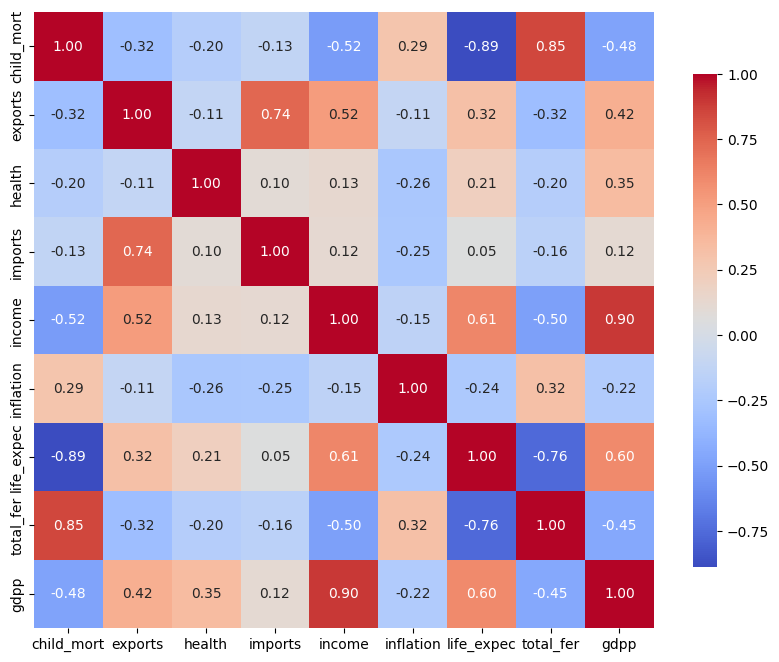

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, 
            fmt = ".2f", 
            cmap = 'coolwarm',
            cbar_kws = {"shrink": .8})

array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

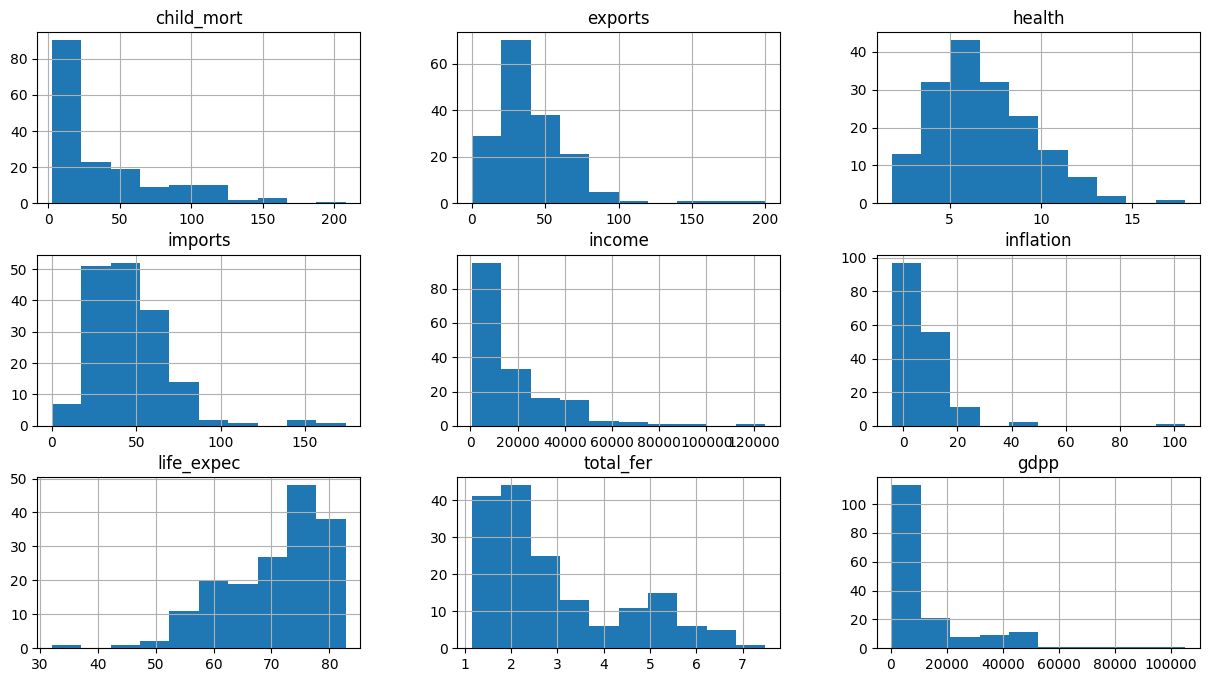

In [27]:
plt.rcParams["figure.figsize"] = (15, 8)
data.hist()

In [28]:
data1 = data.drop(['country', 'gdpp', 'inflation'], axis = 1)
for dato in data1:
    fig = px.scatter(data, x = 'gdpp', y = dato,
                    size = dato, color = 'country')
    fig.show()

In [29]:
fig = px.violin(data, y = "gdpp",  points = 'all', box = True, hover_data = data.columns)
fig.show()

In [30]:
X1 = data.drop(['country'], axis = 1)

In [31]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

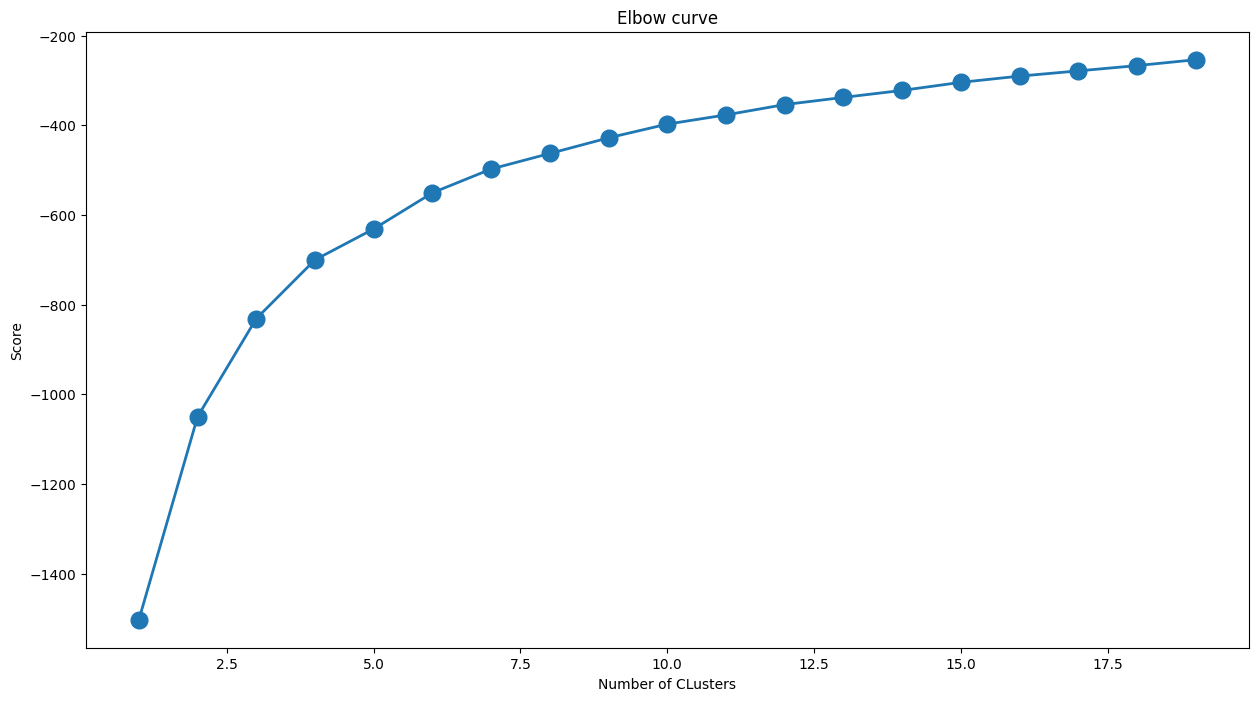

In [32]:
nc = range(1, 20)
kmeans = [KMeans(n_clusters = k) for k in nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(nc, score, linewidth = 2, markersize = 12, marker='o')
plt.xlabel('Number of CLusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()

In [33]:
model = KMeans(n_clusters = 4)
model.fit(X)
centroids = model.cluster_centers_
print(centroids)

[[-0.82860929  0.17262066  0.85918977 -0.29637276  1.46227512 -0.47818851
   1.10764922 -0.76368146  1.66190214]
 [ 1.38209405 -0.44902617 -0.17115749 -0.1972886  -0.69747801  0.40850458
  -1.27706228  1.39559546 -0.60950969]
 [-0.41103452  0.0076087  -0.20315863  0.04911688 -0.21707832 -0.03332883
   0.24812404 -0.43375408 -0.33115921]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [34]:
labels = model.predict(X)
C = model.cluster_centers_
colors = ['red', 'blue', 'green', 'yellow']
assign = []

for row in labels:
    assign.append(colors[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

<Figure size 1500x800 with 0 Axes>

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 3], X[:, 4], X[:, 5], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

<Figure size 1500x800 with 0 Axes>

In [36]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 6], X[:, 7], X[:, 8], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

<Figure size 1500x800 with 0 Axes>

In [37]:
copy = pd.DataFrame()
copy['country'] = data['country'].values
copy['gdpp'] = data['gdpp'].values
copy['label'] = labels
amount = pd.DataFrame()
amount['color'] = colors
amount['amount'] = copy.groupby('label').size()
amount

,color,amount
0,red,30
1,blue,46
2,green,88
3,yellow,3
